In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# DATA CLEANING 

In [2]:
df= pd.read_csv(r'C:\Users\Lenovo\Downloads\Python_Diwali_Sales_Analysis\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.shape

(11251, 13)

In [10]:
df.dropna(inplace=True) #to remove null values

In [11]:
df.shape

(11239, 13)

In [12]:
df['Amount']=df['Amount'].astype('int') #to change datatype of Amount column 

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS 

# Gender

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

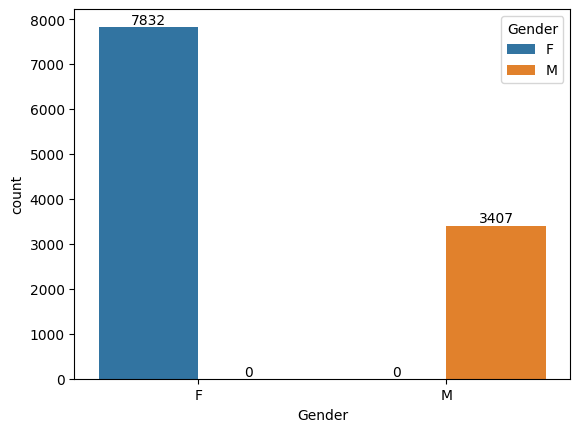

In [15]:
ax=sns.countplot(x="Gender",data=df,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [16]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False )

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

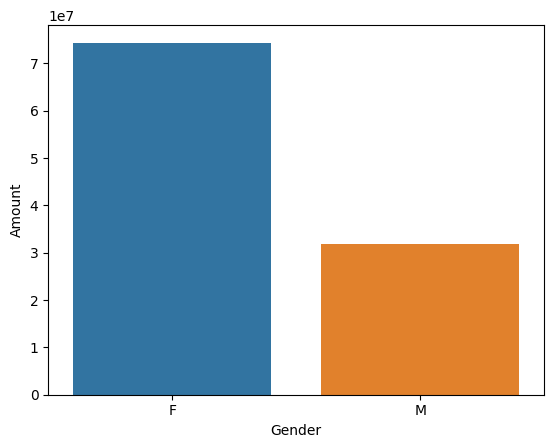

In [17]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False )
sns.barplot(x='Gender', y= 'Amount',data=sales_gen)

## From above graph we can clearly see that most of the buyers are female's  as compare to male's  

# Age

In [18]:
df.columns 

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

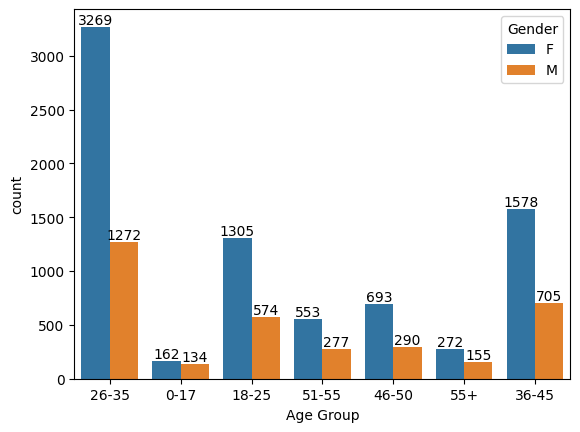

In [19]:
ax=sns.countplot(x='Age Group',data=df,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

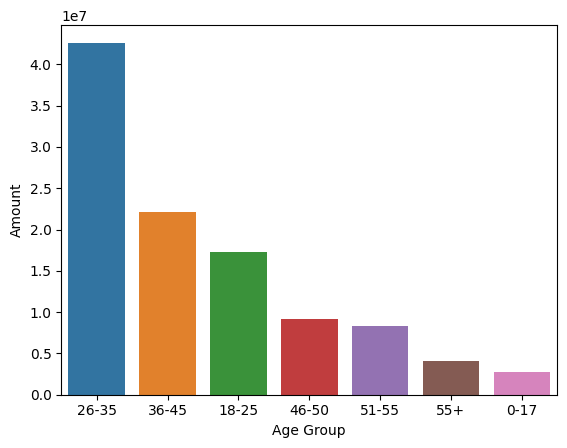

In [20]:
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False )
sns.barplot(x='Age Group', y= 'Amount',data=sales_age)

## From above graph we can clearly see that most of the amount spend by age between (26-35) females

# State 

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

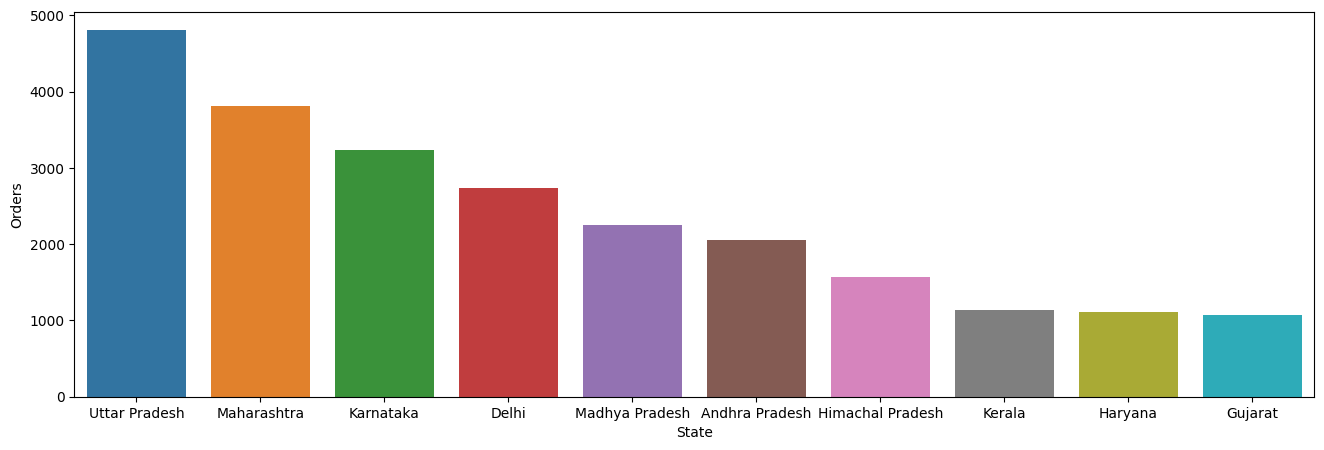

In [22]:
sales_states=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values('Orders',ascending=False).head(10)
#sns.set(rc={'figure.figsize':(15,5)})
fig,ax = plt.subplots(figsize=(16,5))
sns.barplot(data=sales_states,x='State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

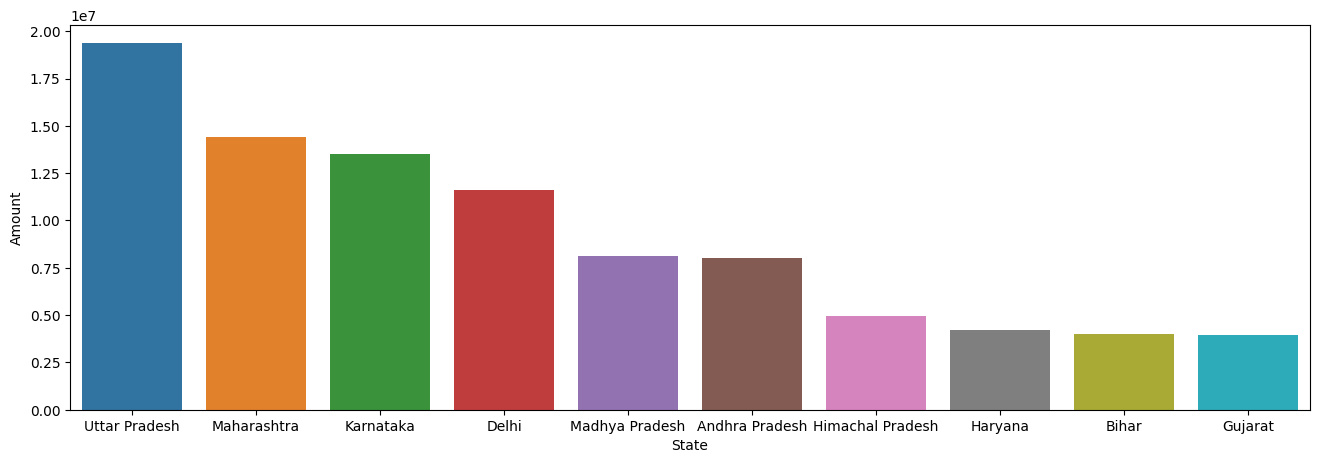

In [23]:
sales_states=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False).head(10)
#sns.set(rc={'figure.figsize':(15,5)})
fig,ax = plt.subplots(figsize=(16,5))
sns.barplot(data=sales_states,x='State',y= 'Amount')

# From above graph we can see that most of the orders as well as amount are from Uttar Pradesh,Maharastra & Karnataka respectively.  

## Marital Status

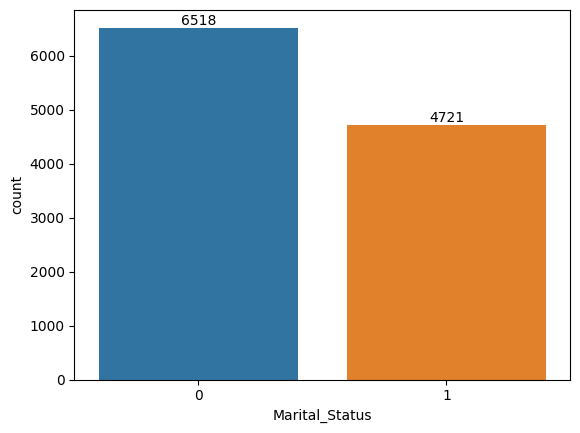

In [24]:
ax=sns.countplot(x="Marital_Status",data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

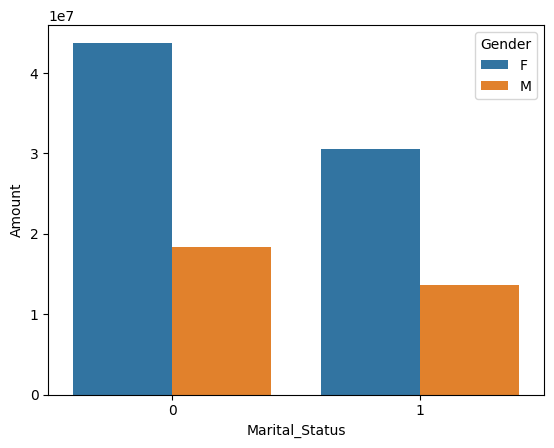

In [25]:
sales_age=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False )
sns.barplot(x='Marital_Status', y= 'Amount',data=sales_age,hue='Gender')

 #  From above graph we can see that max amount spend by married women.

## Occupation

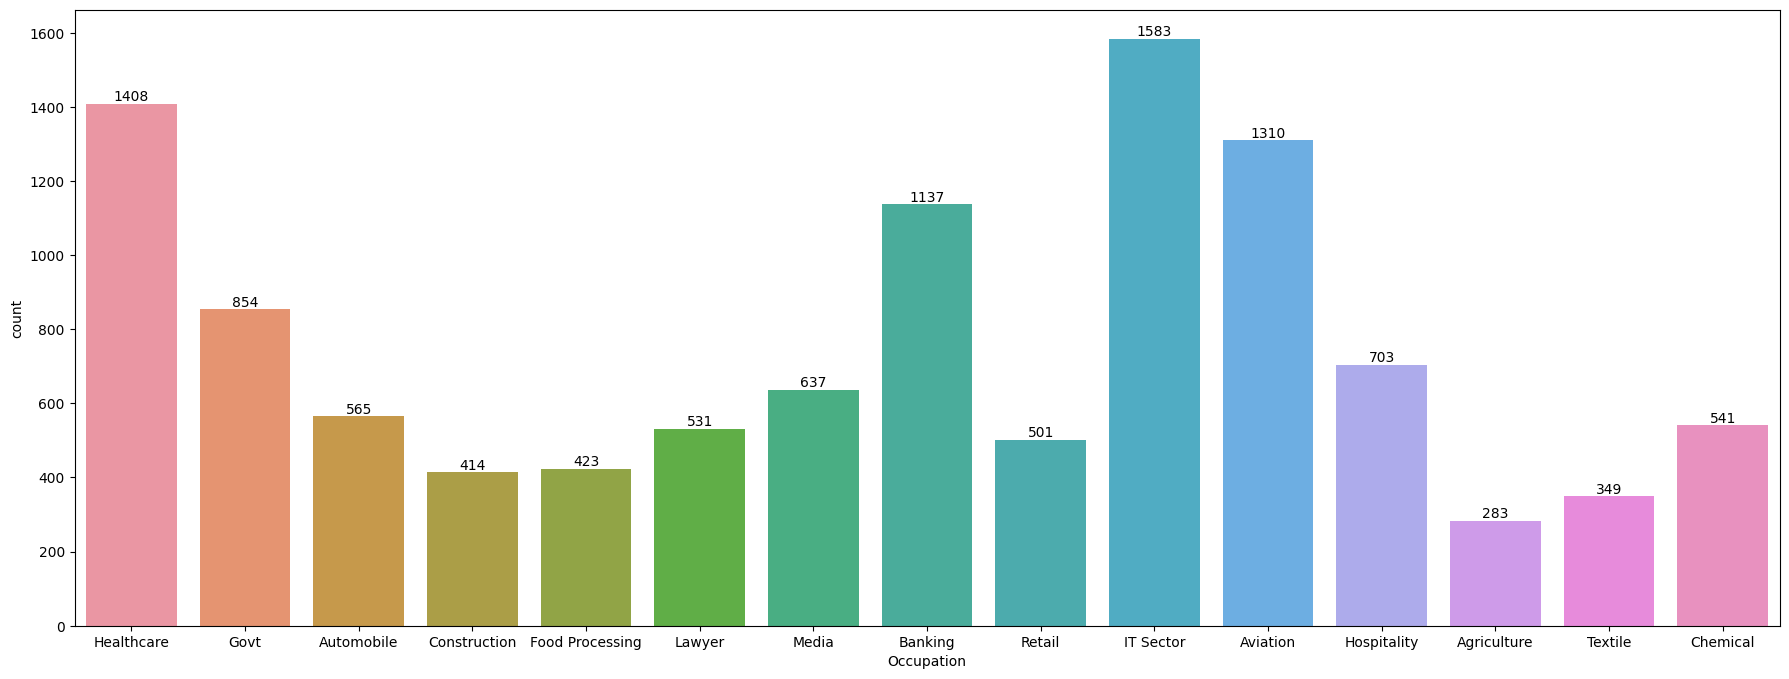

In [26]:
fig,ax = plt.subplots(figsize=(22,8))
ax=sns.countplot(x="Occupation",data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

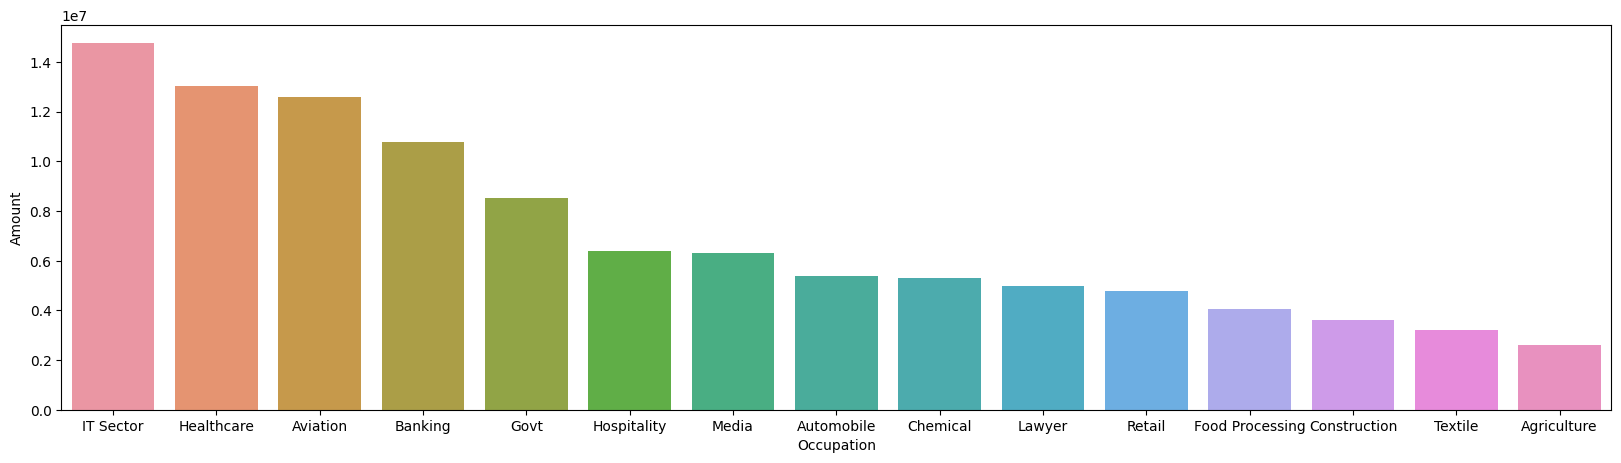

In [27]:
sales_states=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)
fig,ax = plt.subplots(figsize=(20,5))
sns.barplot(data=sales_states,x='Occupation',y= 'Amount')

# From above graph we can see that most of the buyer are working in IT-Sector,Heathcare and Aviation.

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

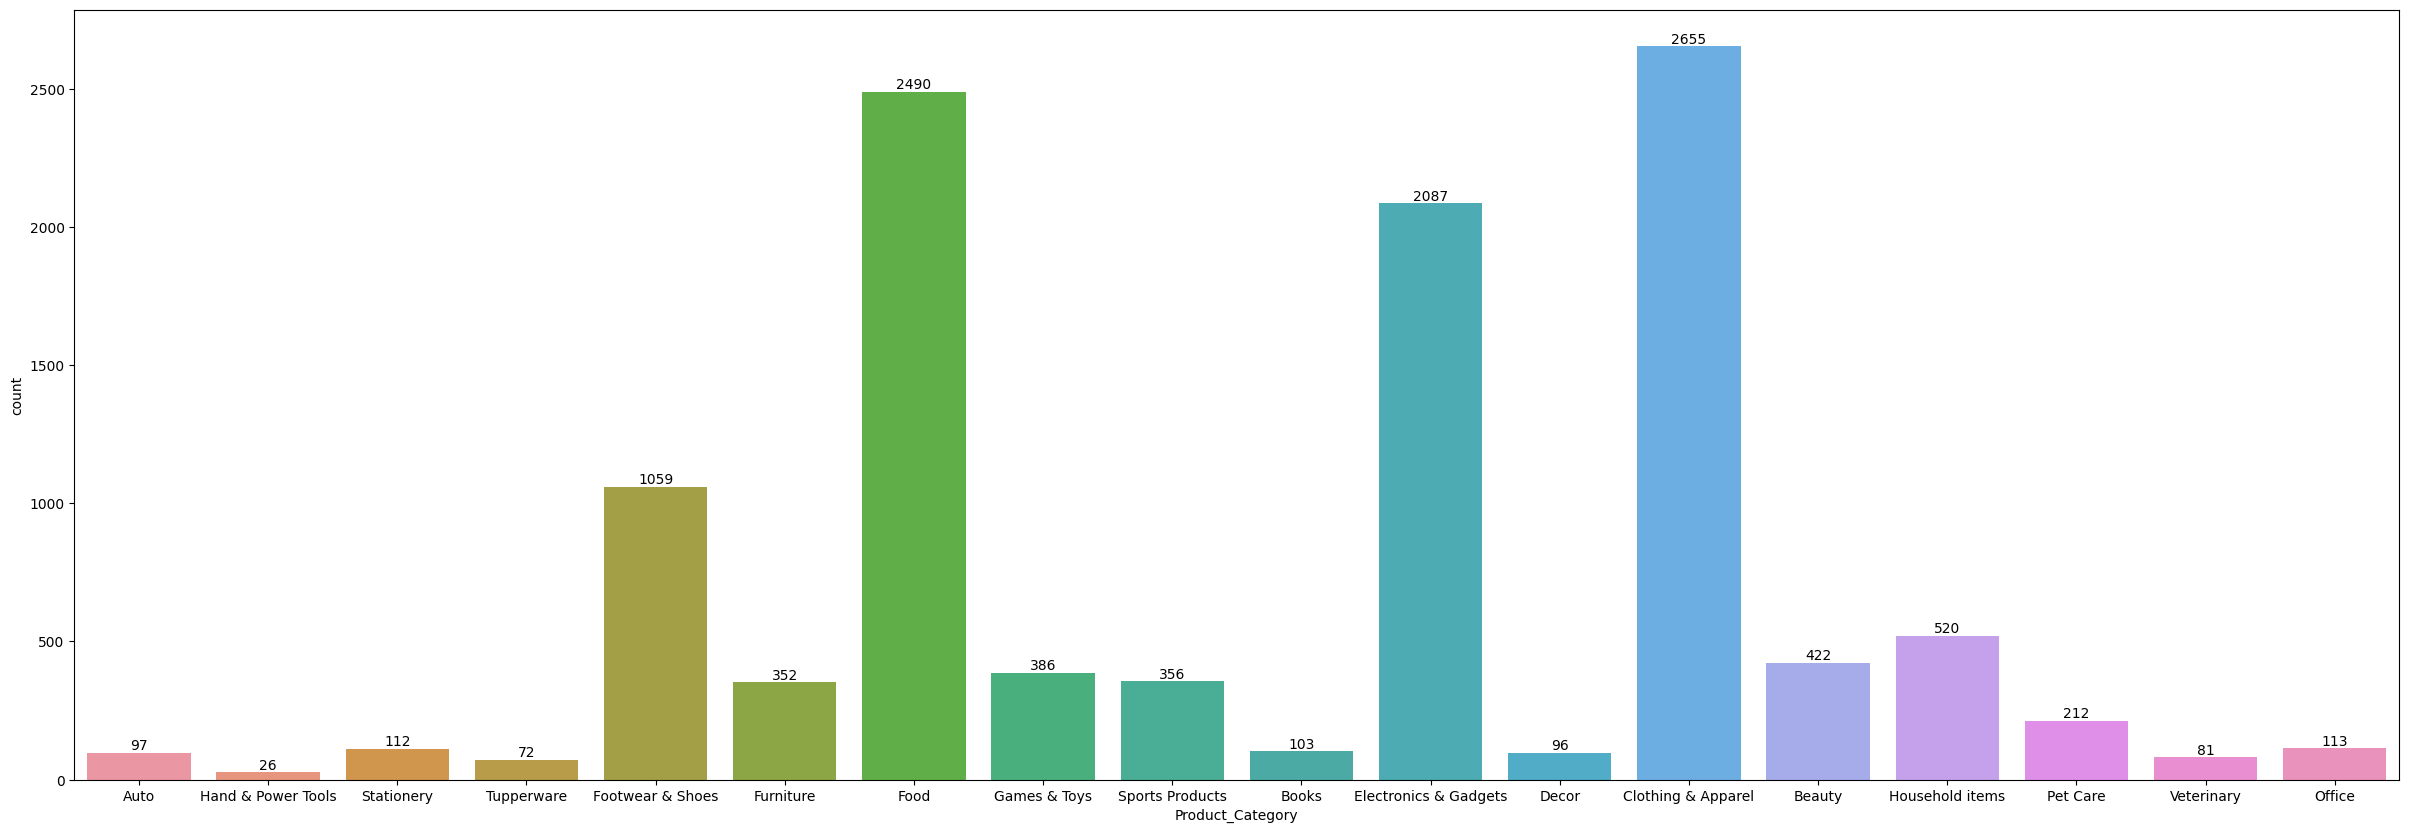

In [29]:
fig,ax = plt.subplots(figsize=(30,10))
ax=sns.countplot(x="Product_Category",data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

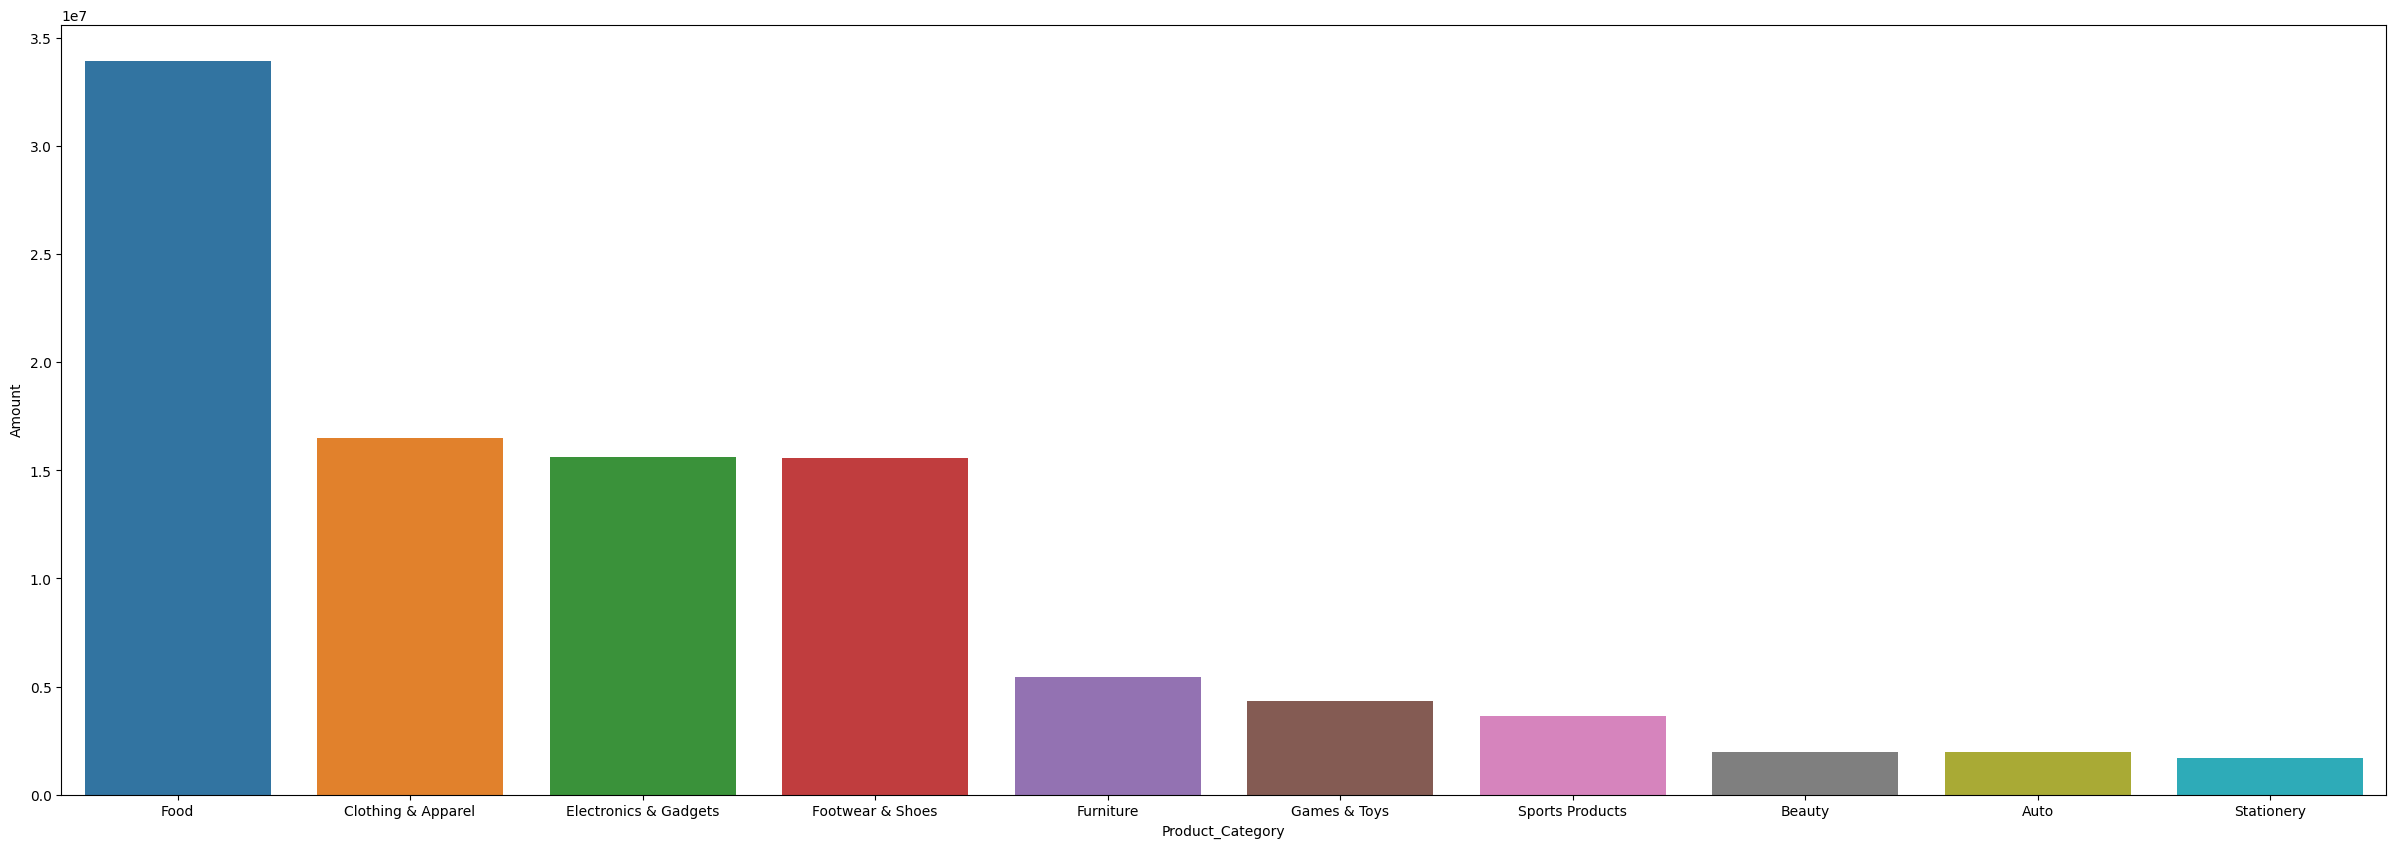

In [30]:
sales_states=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False).head(10)
fig,ax = plt.subplots(figsize=(30,10))
sns.barplot(data=sales_states,x='Product_Category',y= 'Amount')

# conclusion :

## Married women age group (26-35yrs) from Uttar pradesh,Maharashtra and Karnataka working in IT sector, Healthcare and aviation are most likely to buy products from Food,Clothing and Electronics categories. 